In [1]:
import pandas as pd

# Load the uploaded Excel file to check its structure
file_path = '../dataset/rab107row.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows to understand the structure
data.head()

,namaproyek,rab,waktu,provinsi,tahun,luas,subitem,tinggi,lantai,ikk,ihbp,inflasi
0,Gedung Apartemen,2.641914e+10,196,Jawa Barat,2019,17401.00,4,21.8,6,103.03,143.72,3.21
1,Gedung Apartemen,8.821079e+10,273,DKI Jakarta,2022,16320.59,6,47.6,14,121.48,107.66,4.21
2,Gedung Apartemen,8.171200e+10,348,DKI Jakarta,2023,23688.00,5,34.0,10,116.73,113.88,2.28
3,Gedung Apartemen,3.690000e+11,830,Banten,2021,55000.00,6,49.8,16,97.64,109.64,1.91
4,Gedung Apartemen,5.400316e+11,700,DKI Jakarta,2023,150000.00,6,105.0,30,116.73,113.88,2.28


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import BayesianRidge, Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [3]:
# Label encoding kolom 'Provinsi' dan nama proyek karena nilainya kategorikal
label_encoder = LabelEncoder()
data['label_provinsi'] = label_encoder.fit_transform(data['provinsi'])
data['label_namaproyek'] = label_encoder.fit_transform(data['namaproyek'])

# Melihat nilai unik dari hasil encoding kolom 'provinsi_encoded'
provinsi_unik = data[['provinsi', 'label_provinsi']].drop_duplicates().sort_values(
    by='label_provinsi')

# Melihat nilai unik dari hasil encoding kolom 'namaproyek_encoded'
namaproyek_unik = data[['namaproyek', 'label_namaproyek']].drop_duplicates().sort_values(
    by='label_namaproyek')

In [4]:
data.corr(numeric_only=True)

,rab,waktu,tahun,luas,subitem,tinggi,lantai,ikk,ihbp,inflasi,label_provinsi,label_namaproyek
rab,1.000000,0.357484,0.060933,0.632907,0.352278,0.235160,0.179495,0.078276,0.049301,0.034420,-0.148697,0.005322
waktu,0.357484,1.000000,-0.179575,0.602317,0.208359,0.713314,0.705740,-0.033865,0.132442,0.021761,-0.371752,-0.312091
tahun,0.060933,-0.179575,1.000000,-0.137601,0.037913,-0.139251,-0.214643,0.048582,-0.435208,0.021384,0.125955,0.167831
luas,0.632907,0.602317,-0.137601,1.000000,0.272672,0.503838,0.518672,-0.038032,0.245179,0.061292,-0.222626,-0.234600
subitem,0.352278,0.208359,0.037913,0.272672,1.000000,0.002265,-0.014051,0.135569,0.004466,-0.088625,-0.166976,0.185481
tinggi,0.235160,0.713314,-0.139251,0.503838,0.002265,1.000000,0.925671,-0.000700,0.137263,0.000499,-0.314240,-0.442322
lantai,0.179495,0.705740,-0.214643,0.518672,-0.014051,0.925671,1.000000,-0.032055,0.189287,-0.010556,-0.324992,-0.508638
ikk,0.078276,-0.033865,0.048582,-0.038032,0.135569,-0.000700,-0.032055,1.000000,-0.019930,0.160898,0.164619,0.061549
ihbp,0.049301,0.132442,-0.435208,0.245179,0.004466,0.137263,0.189287,-0.019930,1.000000,0.470729,0.050047,-0.231761
inflasi,0.034420,0.021761,0.021384,0.061292,-0.088625,0.000499,-0.010556,0.160898,0.470729,1.000000,0.257682,-0.020317


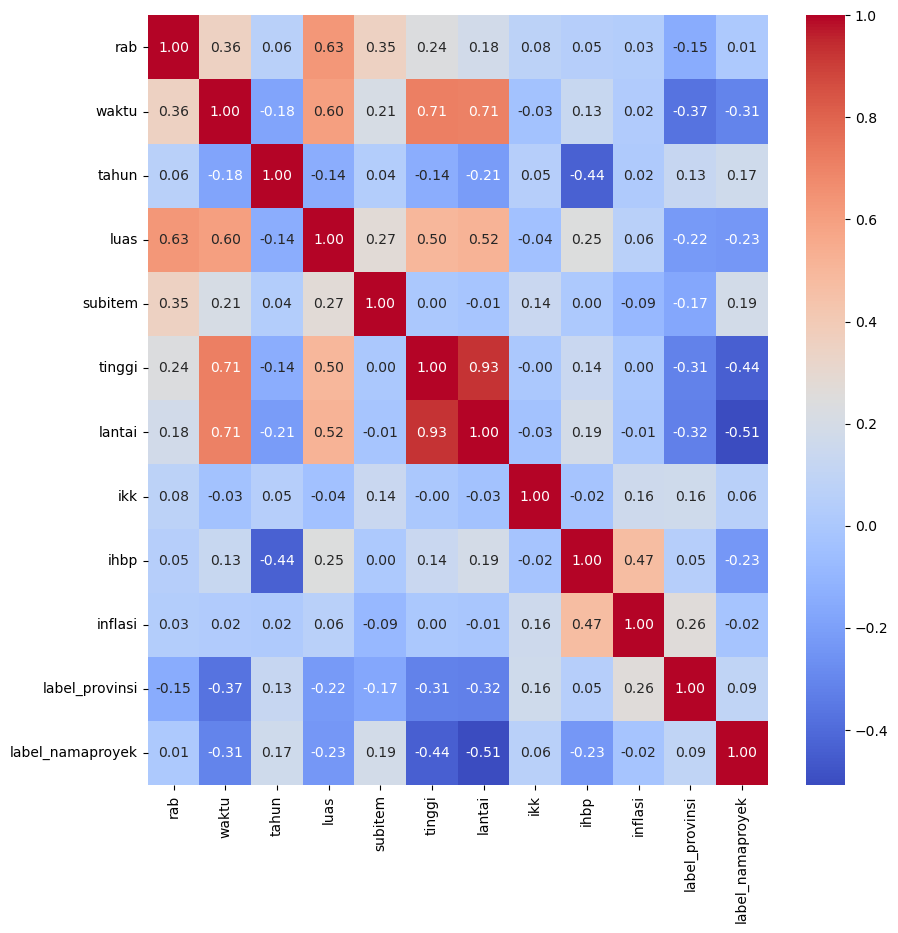

In [5]:
# Digunakan untuk membuat visualisasi dalam bentuk grafik atau plot
import seaborn as sns
import matplotlib.pyplot as plt
# Visualisasi korelasi antar fitur atau kolom apakah saling berpengaruh atau tidak
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data.corr(numeric_only=True), 
            annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   namaproyek        107 non-null    object 
 1   rab               107 non-null    float64
 2   waktu             107 non-null    int64  
 3   provinsi          107 non-null    object 
 4   tahun             107 non-null    int64  
 5   luas              107 non-null    float64
 6   subitem           107 non-null    int64  
 7   tinggi            107 non-null    float64
 8   lantai            107 non-null    int64  
 9   ikk               107 non-null    float64
 10  ihbp              107 non-null    float64
 11  inflasi           107 non-null    float64
 12  label_provinsi    107 non-null    int32  
 13  label_namaproyek  107 non-null    int32  
dtypes: float64(6), int32(2), int64(4), object(2)
memory usage: 11.0+ KB


In [7]:
cekduplikat = data[data.duplicated()]
cekduplikat

,namaproyek,rab,waktu,provinsi,tahun,luas,subitem,tinggi,lantai,ikk,ihbp,inflasi,label_provinsi,label_namaproyek
22,Gedung Apartemen,2.265890e+11,730,Banten,2020,35068.8,5,108.65,31,97.05,103.68,1.45,1,0


In [8]:
data = data.drop_duplicates()

cekduplikat = data[data.duplicated()]
cekduplikat, data.shape

(Empty DataFrame
 Columns: [namaproyek, rab, waktu, provinsi, tahun, luas, subitem, tinggi, lantai, ikk, ihbp, inflasi, label_provinsi, label_namaproyek]
 Index: [],
 (106, 14))

In [9]:
# Identifikasi kolom numerik untuk analisis outlier
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analisis outlier untuk setiap kolom numerik
outlier_results = {}
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    outlier_results[col] = {
        "outliers_count": len(outliers),
        "lower_bound": lower,
        "upper_bound": upper
    }

# Menampilkan hasil analisis outlier
outlier_results

{'rab': {'outliers_count': 6,
  'lower_bound': -294520125137.51874,
  'upper_bound': 541583675082.5112},
 'waktu': {'outliers_count': 2,
  'lower_bound': -166.375,
  'upper_bound': 812.625},
 'tahun': {'outliers_count': 0, 'lower_bound': 2013.0, 'upper_bound': 2029.0},
 'luas': {'outliers_count': 15,
  'lower_bound': -32257.999999999993,
  'upper_bound': 61368.399999999994},
 'subitem': {'outliers_count': 24, 'lower_bound': 3.5, 'upper_bound': 7.5},
 'tinggi': {'outliers_count': 4,
  'lower_bound': -55.63749999999999,
  'upper_bound': 129.0625},
 'lantai': {'outliers_count': 5,
  'lower_bound': -15.875,
  'upper_bound': 35.125},
 'ikk': {'outliers_count': 1,
  'lower_bound': 82.47999999999999,
  'upper_bound': 137.28},
 'ihbp': {'outliers_count': 0,
  'lower_bound': 53.56999999999999,
  'upper_bound': 197.81},
 'inflasi': {'outliers_count': 3,
  'lower_bound': -0.07000000000000006,
  'upper_bound': 5.21}}

In [10]:
# Identifikasi kolom numerik untuk analisis outlier
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Fungsi untuk mendeteksi dan menghapus baris yang mengandung outlier
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Hapus baris yang memiliki nilai outlier
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Hapus outlier untuk setiap kolom numerik
data_cleaned = data.copy()
for col in numerical_columns:
    data_cleaned = remove_outliers_iqr(data_cleaned, col)

In [12]:
data_cleaned.shape

(49, 14)

In [14]:
# Split data into features and target
X1 = data_cleaned.drop(columns=['rab', 'namaproyek', 'provinsi', 'ikk'])
y1 = data_cleaned['rab']

# Split into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, 
    test_size=0.3, 
    random_state=42)

# Split into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X1, y1, 
    test_size=0.2, 
    random_state=42)



In [15]:
# Initialize models
models = {
    'AdaBoost': AdaBoostRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN Regressor': KNeighborsRegressor(),
    'Lasso Regression': Lasso(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Ridge Regression': Ridge(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor()
}

# 70:30
# Train and evaluate each model with additional metrics
results1 = []
for name1, model1 in models.items():
    # Fit model to training data
    model1.fit(X_train1, y_train1)
    
    # Predict on training data
    y_train_pred1 = model1.predict(X_train1)
    
    # Predict on testing data
    y_pred1 = model1.predict(X_test1)
    
    # Calculate metrics for training data
    r2_train1 = r2_score(y_train1, y_train_pred1)
    
    # Calculate metrics for testing data
    mse1 = mean_squared_error(y_test1, y_pred1)
    mae1 = mean_absolute_error(y_test1, y_pred1)
    r21 = r2_score(y_test1, y_pred1)
    
    # Append results
    results1.append({
        'Model': name1,
        'Training R2 Score': r2_train1,
        'Testing RMSE': np.sqrt(mse1),
        'Testing MAE': mae1,
        'Testing R2 Score': r21
    })

# Convert results into a DataFrame for better visualization
results_df1 = pd.DataFrame(results1).sort_values(by='Testing R2 Score', ascending=False)

# 80:20
# Train and evaluate each model with additional metrics
results2 = []
for name2, model2 in models.items():
    # Fit model to training data
    model2.fit(X_train2, y_train2)
    
    # Predict on training data
    y_train_pred2 = model2.predict(X_train2)
    
    # Predict on testing data
    y_pred2 = model2.predict(X_test2)
    
    # Calculate metrics for training data
    r2_train2 = r2_score(y_train2, y_train_pred2)
    
    # Calculate metrics for testing data
    mse2 = mean_squared_error(y_test2, y_pred2)
    mae2 = mean_absolute_error(y_test2, y_pred2)
    r22 = r2_score(y_test2, y_pred2)
    
    # Append results
    results2.append({
        'Model': name2,
        'Training R2 Score': r2_train2,
        'Testing RMSE': np.sqrt(mse2),
        'Testing MAE': mae2,
        'Testing R2 Score': r22
    })

# Convert results into a DataFrame for better visualization
results_df2 = pd.DataFrame(results2).sort_values(by='Testing R2 Score', ascending=False)


In [16]:
results_df1

,Model,Training R2 Score,Testing RMSE,Testing MAE,Testing R2 Score
0,AdaBoost,9.703651e-01,2.841365e+10,2.111539e+10,0.512013
7,Random Forest,8.367574e-01,3.131696e+10,2.657629e+10,0.407193
8,Ridge Regression,6.238893e-01,3.372756e+10,2.727814e+10,0.312418
4,KNN Regressor,3.767272e-01,3.477725e+10,2.807905e+10,0.268954
5,Lasso Regression,6.249621e-01,3.495673e+10,2.754275e+10,0.261389
6,Linear Regression,6.249621e-01,3.495673e+10,2.754275e+10,0.261389
3,Gradient Boosting,9.999594e-01,3.829745e+10,2.902528e+10,0.113469
1,Bayesian Ridge,1.154632e-13,4.067505e+10,3.344102e+10,-0.000024
9,SVR,-1.706830e-01,4.740693e+10,3.415409e+10,-0.358432
10,XGBoost,1.000000e+00,5.399203e+10,4.113105e+10,-0.762031


Hasil 80:20

In [17]:
results_df2

,Model,Training R2 Score,Testing RMSE,Testing MAE,Testing R2 Score
0,AdaBoost,9.532317e-01,2.329950e+10,1.800079e+10,0.605489
6,Linear Regression,6.095573e-01,3.010614e+10,2.817897e+10,0.341317
5,Lasso Regression,6.095573e-01,3.010614e+10,2.817897e+10,0.341317
8,Ridge Regression,6.092038e-01,3.032204e+10,2.852208e+10,0.331836
7,Random Forest,8.940933e-01,3.241497e+10,2.760593e+10,0.236415
4,KNN Regressor,4.304386e-01,3.561088e+10,2.931025e+10,0.078423
1,Bayesian Ridge,1.697531e-13,3.718021e+10,2.821746e+10,-0.004592
9,SVR,-2.438018e-01,4.536363e+10,3.310066e+10,-0.495484
3,Gradient Boosting,9.999361e-01,6.430318e+10,3.664556e+10,-2.004908
10,XGBoost,1.000000e+00,6.895334e+10,4.038446e+10,-2.455229
